# Отток клиентов

# Введение

### Описание проекта 
Проект нацелен на анализ данных о клиентах «Бета-Банка» в связи со значительным ежемесячным оттоком. Банковские маркетологи провели оценку и выбрали стратегию удержания старых клиентов, так как она более выгодна, чем стратегия привлечения новых.
### Цель проекта
Целью является прогнозирование, уйдёт клиент из банка в ближайшее время или нет.
### Описание данных
**Нам предоставили доступ к историческим данным о поведении клиентов и расторжении договоров с банком.**   
Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

В таблице данных представлены следующие значения:  

**Признаки:**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата  

**Целевой признак:**
- Exited — факт ухода клиента

### План работы
1. [Подготовка данных](#section_1)
2. [Исследовательский анализ](#section_2)  
3. [Исследование задачи](#section_3)  
4. [Борьба с дисбалансом классов](#section_4)
5. [Тестирование модели](#section_5)
6. [Общий вывод](#section_6)

<a id='section_1'></a>
## Подготовка данных

### Изучение общей информации о данных

Загрузим необходимые библиотеки.

In [1]:
# анализ данных
import pandas as pd
import numpy as np

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt

# модели машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# вспомогательные средства 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

Загрузим данные.

In [2]:
try:
    data = pd.read_csv(r'D:\projects_data\tariffs\Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')
    
data.drop('RowNumber', axis=True, inplace=True)

In [3]:
# настройка отображения всех столбцов таблицы
pd.set_option('display.max_columns', None)
# настройка отображения графиков
sns.set(rc={'figure.figsize': (10,5)})

Посмотрим на содержимое предоставленной таблицы.

In [4]:
data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


### Предобработка данных

#### Переименование столбцов

In [6]:
data.columns = data.columns.str.replace(r"([A-Z])", r" \1", regex=True).str.lower().str.replace(r" ", r"_").str[1:]

In [7]:
data.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


#### Обработка пропусков

In [8]:
data.isna().sum()

customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

Как мы видим, в столбце со сроком сотрудничества клиентов с банком присутствуют пропуски в 9% записей.

In [9]:
data[data['tenure'].isna()].head(10)

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


<AxesSubplot:>

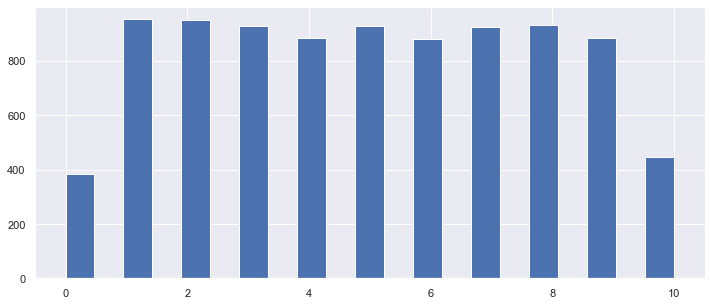

In [10]:
data['tenure'].sort_values().hist(bins=21, figsize=(12,5))

<AxesSubplot:>

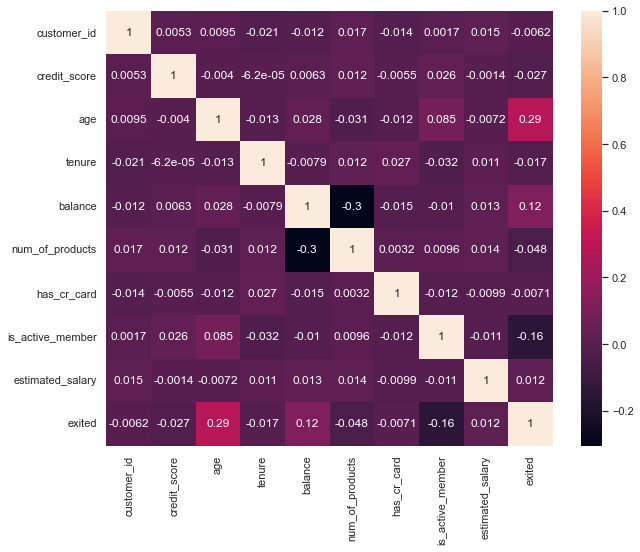

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

Из преведённой выше информации можно сделать вывод, что данные из столбца `tenure` не имеют зависимости с другими признаками и носят случайный характер, следовательно, для избежания потери 9% наблюдейний целесообразно заполнить пропуски случайными значениями. Для этого сгенерируем случайные числа из диапазона значений столбца, а затем заменим ими пропуски.

In [12]:
fill_values = np.random.randint(0, 11, data['tenure'].isna().sum())

In [13]:
data.loc[data['tenure'].isna(), 'tenure'] = fill_values

<AxesSubplot:>

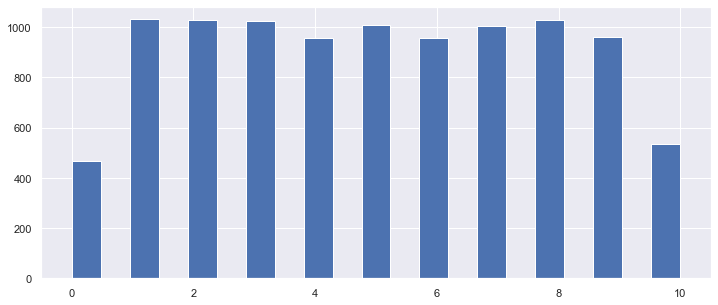

In [14]:
data['tenure'].sort_values().hist(bins=21, figsize=(12,5))

Как мы видим, заметных изменений распределения нет.

In [15]:
# проверка
data['tenure'].isna().sum()

0

<a id='section_2'></a>
## Исследовательский анализ

Определим долю ушедших клиентов.

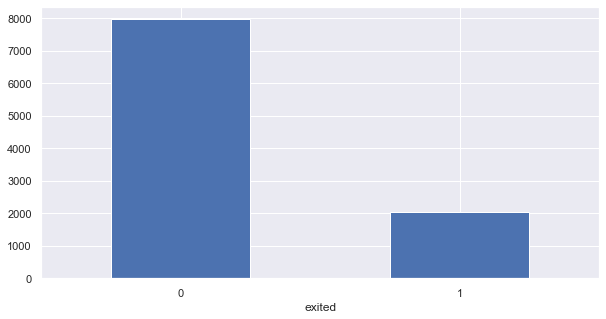

Доля ушедших клиентов: 0.2


In [16]:
data.groupby('exited')['customer_id'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print('Доля ушедших клиентов:', round(data['exited'].mean(), 2))

### Отток в зависимости от кредитного рейтинга

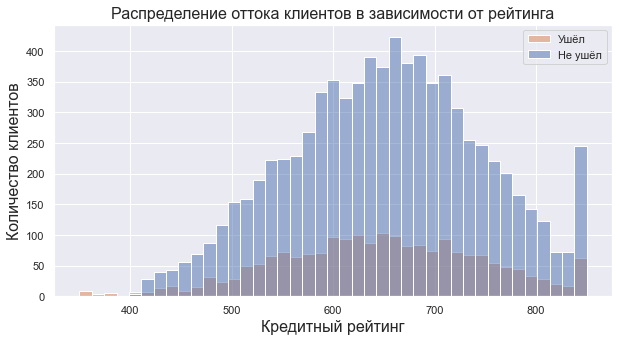

In [17]:
sns.histplot(data=data, x='credit_score', hue='exited')

plt.title('Распределение оттока клиентов в зависимости от рейтинга', size=16)
plt.legend(['Ушёл', 'Не ушёл'])
plt.xlabel('Кредитный рейтинг', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

Распределения повторяют друг друга, следовательно, нельзя сказать о завсисмости оттока от кредитного рейтинга.

### Отток в зависимости от региона

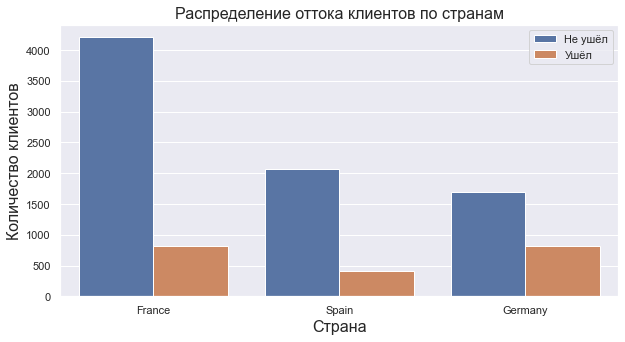

In [18]:
sns.countplot(data=data, x='geography', hue='exited')

plt.title('Распределение оттока клиентов по странам', size=16)
plt.legend(['Не ушёл', 'Ушёл'])
plt.xlabel('Страна', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

In [19]:
data.groupby('geography')['exited'].mean()

geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: exited, dtype: float64

По графику видно, что в регионе `Germany` наблюдается самый большой относительный отток пользователей.

### Отток в зависимости от пола клиента

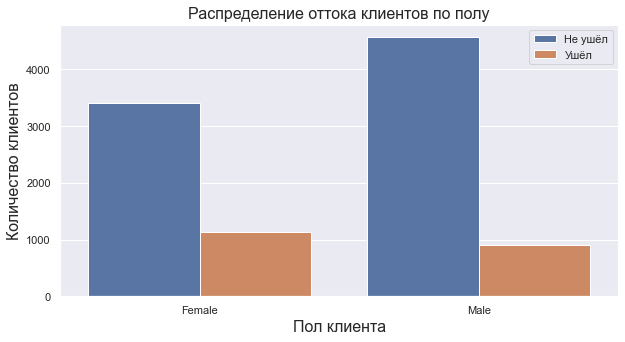

In [20]:
sns.countplot(data=data, x='gender', hue='exited')

plt.title('Распределение оттока клиентов по полу', size=16)
plt.legend(['Не ушёл', 'Ушёл'])
plt.xlabel('Пол клиента', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

In [21]:
data.groupby('gender')['exited'].mean()

gender
Female    0.250715
Male      0.164559
Name: exited, dtype: float64

Женщины уходят чаще.

### Отток в зависимости от возраста клиента

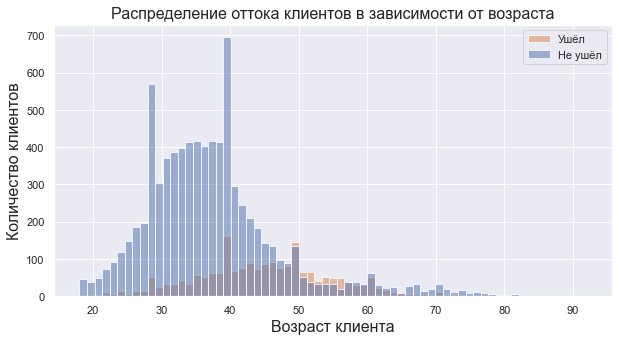

In [22]:
sns.histplot(data=data, x='age', hue='exited')

plt.title('Распределение оттока клиентов в зависимости от возраста', size=16)
plt.legend(['Ушёл', 'Не ушёл'])
plt.xlabel('Возраст клиента', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

In [23]:
age_dist = data.groupby('exited')['age'].mean()
print('Средний возраст лояльных клиентов:', age_dist[0].round(2))
print('Средний возраст ушедших клиентов:', age_dist[1].round(2))

Средний возраст лояльных клиентов: 37.41
Средний возраст ушедших клиентов: 44.84


Наблюдается значительное смещение распределения ушедших клинтов. Средний возраст ушедших клиентов больше на 7.43 лет.

### Отток в зависимости от времени сотрудничества с банком

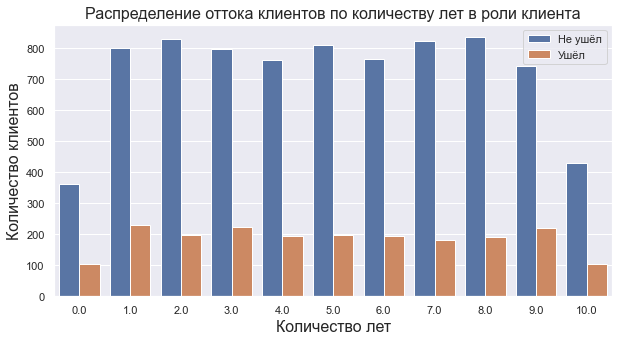

In [24]:
sns.countplot(data=data, x='tenure', hue='exited')

plt.title('Распределение оттока клиентов по количеству лет в роли клиента', size=16)
plt.legend(['Не ушёл', 'Ушёл'])
plt.xlabel('Количество лет', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

Распредения в общем повторяют друг друга. Увеличеие количества клиентов со сроком в 5 лет обусловлено заполнением пропусков данным значением. Следовательно, нельзя сделать выводов о связи отттока со сроком клиентства.

### Отток в зависимости от количества денег на счёте

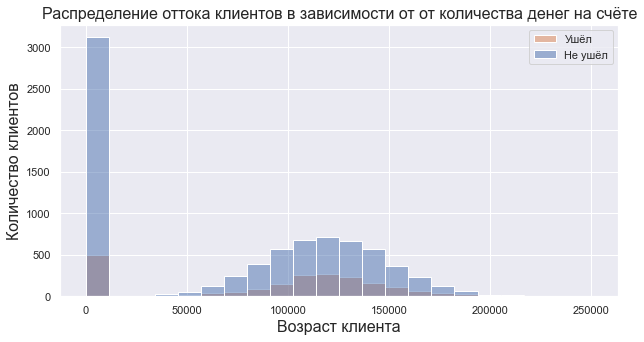

In [25]:
sns.histplot(data=data, x='balance', hue='exited')

plt.title('Распределение оттока клиентов в зависимости от от количества денег на счёте', size=16)
plt.legend(['Ушёл', 'Не ушёл'])
plt.xlabel('Возраст клиента', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

На графике заметен выброс в районе нулевого значения.

In [26]:
print('Доля ушедших клиентов с нулевым балансом', round(data[data['balance'] == 0]['exited'].mean(),2))
print('Доля ушедших клиентов с ненулевым балансом', round(data[data['balance'] != 0]['exited'].mean(),2))

Доля ушедших клиентов с нулевым балансом 0.14
Доля ушедших клиентов с ненулевым балансом 0.24


Клиенты с нулевым балансом уходят реже.

### Отток в зависимости от количества продуктов банка

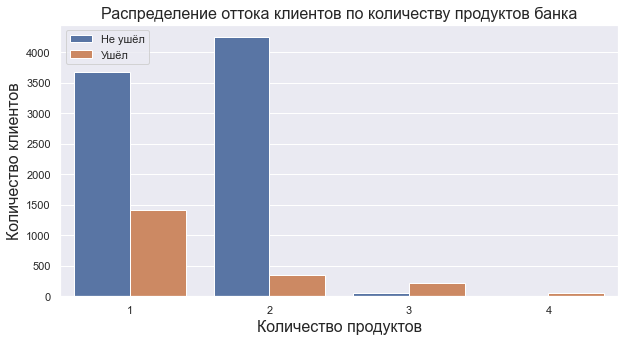

In [27]:
sns.countplot(data=data, x='num_of_products', hue='exited')

plt.title('Распределение оттока клиентов по количеству продуктов банка', size=16)
plt.legend(['Не ушёл', 'Ушёл'])
plt.xlabel('Количество продуктов', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

На графике видно, что большинство клиентов уходит при наличии одного продукта, но в относительном измерении самый большой процент ушедших клиентов имеет категория с 3-4 продуктами банка.

### Отток в зависимости от наличия карты банка

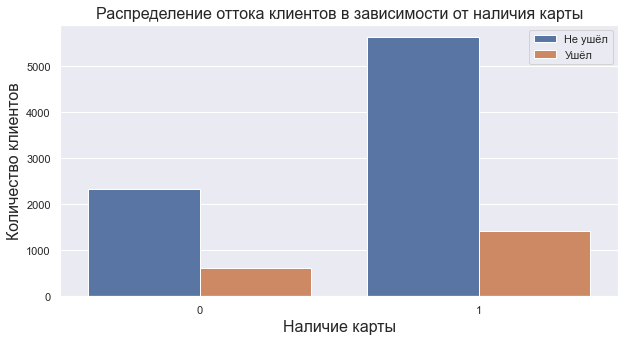

In [28]:
sns.countplot(data=data, x='has_cr_card', hue='exited')

plt.title('Распределение оттока клиентов в зависимости от наличия карты', size=16)
plt.legend(['Не ушёл', 'Ушёл'])
plt.xlabel('Наличие карты', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

In [29]:
data.groupby('has_cr_card')['exited'].mean()

has_cr_card
0    0.208149
1    0.201843
Name: exited, dtype: float64

Видно, что отток не зависит от того, есть ли у клиента карта или нет.

### Отток в зависимости от активности клиента

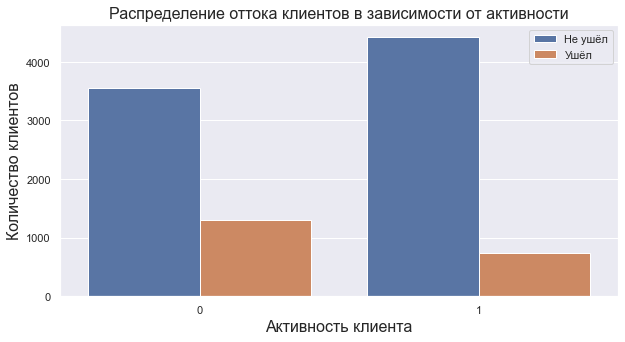

In [30]:
sns.countplot(data=data, x='is_active_member', hue='exited')

plt.title('Распределение оттока клиентов в зависимости от активности', size=16)
plt.legend(['Не ушёл', 'Ушёл'])
plt.xlabel('Активность клиента', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

In [31]:
data.groupby('is_active_member')['exited'].mean()

is_active_member
0    0.268509
1    0.142691
Name: exited, dtype: float64

Неактивные клиенты уходят значительно чаще активных.

### Отток в зависимости от зарплаты клиента

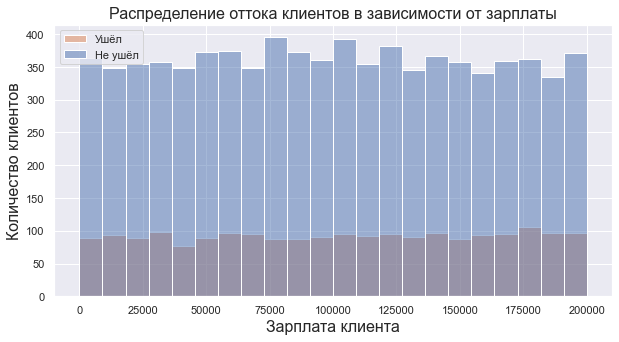

In [32]:
sns.histplot(data=data, x='estimated_salary', hue='exited')

plt.title('Распределение оттока клиентов в зависимости от зарплаты', size=16)
plt.legend(['Ушёл', 'Не ушёл'])
plt.xlabel('Зарплата клиента', size=16)
plt.ylabel('Количество клиентов', size=16)

plt.show()

In [33]:
data.groupby('exited')['estimated_salary'].mean()

exited
0     99738.391772
1    101465.677531
Name: estimated_salary, dtype: float64

Отток не зависит от размера зарплаты.

### Промежуточный вывод

Исследовательский анализ данных выявил зависимости оттока пользователей от:
- региона
- пола
- возраста
- количества продуктов банка 
- активности клиента

<a id='section_3'></a>
## Исследование задачи

### Подготовка признаков для машинного обучения

Использование `customer_id` и `surname` не дают никакой информации, поэтому избавимся от них.

In [34]:
data.drop(['customer_id', 'surname'], axis=1, inplace=True)

### Разделение датасета на тренировочную и валидационную выборки

In [35]:
target = data['exited']
features = data.drop('exited', axis=1)


features_train, f_test, target_train, t_test = \
train_test_split(features, target, test_size=0.5, random_state=12345)

features_valid, features_test, target_valid, target_test = \
train_test_split(f_test, t_test, test_size=0.5, random_state=12345)

In [36]:
# проверка
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)

(5000, 10)

(2500, 10)

(2500, 10)

### Перекодировка категориальных признаков

Воспользуемся методом прямого кодирования для перекодирования категориальных переменных.

In [37]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [38]:
features_train.reset_index(drop=True, inplace=True)
features_valid.reset_index(drop=True, inplace=True)
features_test.reset_index(drop=True, inplace=True)
target_train.reset_index(drop=True, inplace=True)
target_valid.reset_index(drop=True, inplace=True)
target_test.reset_index(drop=True, inplace=True)

### Масштабирование численных признаков 

Создаём список столбцов, содержащих чсленные значения.

In [39]:
numeric_params = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

In [40]:
features_train_num = features_train[numeric_params]
features_valid_num = features_valid[numeric_params]
features_test_num = features_test[numeric_params]

In [41]:
scaler = StandardScaler()

scaler.fit(features_train_num)

features_train_num = pd.DataFrame(scaler.transform(features_train_num), columns=features_train_num.columns)
features_valid_num = pd.DataFrame(scaler.transform(features_valid_num), columns=features_valid_num.columns)
features_test_num = pd.DataFrame(scaler.transform(features_test_num), columns=features_test_num.columns)

Соединяем признаки выборок обратно.

In [42]:
features_train.drop(numeric_params, axis=1, inplace=True)
features_valid.drop(numeric_params, axis=1, inplace=True)
features_test.drop(numeric_params, axis=1, inplace=True)

In [43]:
features_train = features_train_num.join(features_train)
features_valid = features_valid_num.join(features_valid)
features_test = features_test_num.join(features_test)

### Построение модели прогнозирования оттока клиентов банка без учёта дисбаланса классов

Для оценок моделей будем использовать параметры:
- Accuracy
- Precision
- Recall
- F1
- ROC AUC

In [44]:
def scores(target, predicted):
    print('Accuracy:', accuracy_score(target, predicted).round(2))
    print('Precision:', precision_score(target, predicted).round(2))
    print('Recall:', recall_score(target, predicted).round(2))
    print('F1:', f1_score(target, predicted).round(2))
    print('ROC AUC:', roc_auc_score(target, predicted).round(2))

#### LogisticRegression

In [45]:
log_reg = LogisticRegression(random_state=12345, solver='liblinear')
log_reg.fit(features_train, target_train)
predicted_valid = log_reg.predict(features_valid)
scores(target_valid, predicted_valid)

Accuracy: 0.8
Precision: 0.51
Recall: 0.22
F1: 0.31
ROC AUC: 0.58


#### DecisionTreeClassifier

In [46]:
tree = DecisionTreeClassifier(max_depth=5, random_state=12345)
tree.fit(features_train, target_train)
predicted_valid = tree.predict(features_valid)
scores(target_valid, predicted_valid)

Accuracy: 0.85
Precision: 0.7
Recall: 0.42
F1: 0.53
ROC AUC: 0.69


#### RandomForestClassifier с использованием HalvingGridSearchCV

In [47]:
%%time
rfc_hgs_grid = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 60, num = 25)],
           'max_features': ['auto', 'sqrt'],
           'max_depth': [int(x) for x in np.linspace(1, 35, num = 20)],
           'min_samples_split': [2, 3, 5],
           'min_samples_leaf': [1, 3, 5]}

rfc_hgs = HalvingGridSearchCV(RandomForestClassifier(random_state=12345), 
                            rfc_hgs_grid, 
                            scoring="f1", 
                            n_jobs=-1, 
                            min_resources="exhaust", 
                            factor=3)

rfc_hgs.fit(features_train, target_train)
print(rfc_hgs.best_params_)

{'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 13}
CPU times: total: 1min 9s
Wall time: 11min 16s


In [48]:
predicted_valid = rfc_hgs.predict(features_valid)
scores(target_valid, predicted_valid)

Accuracy: 0.85
Precision: 0.7
Recall: 0.45
F1: 0.55
ROC AUC: 0.7


#### RandomForestClassifier с использованием HalvingRandomSearchCV

In [49]:
%%time
rfc_hrs_grid = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)],
           'max_features': ['auto', 'sqrt'],
           'max_depth': [int(x) for x in np.linspace(1, 35, num = 35)],
           'min_samples_split': [2,3,4,5,7],
           'min_samples_leaf': [1,2,3,5,7]}

rfc_hrs = HalvingRandomSearchCV(RandomForestClassifier(random_state=12345), 
                               rfc_hrs_grid,
                               random_state=12345)

rfc_hrs.fit(features_train, target_train)
print(rfc_hrs.best_params_)

{'n_estimators': 97, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 24}
CPU times: total: 2min 9s
Wall time: 2min 9s


In [50]:
predicted_valid = rfc_hrs.predict(features_valid)
scores(target_valid, predicted_valid)

Accuracy: 0.86
Precision: 0.78
Recall: 0.43
F1: 0.55
ROC AUC: 0.7


Наилучший результат показала модель случайного леса с агоритмом подбора гиперпараметров HalvingRandomSearchCV. Она будет использователься в дальнейшем тестировании.

<a id='section_4'></a>
## Борьба с дисбалансом классов

### Upsampling

Для уравновешивания калссов воспользуемся методом увеличения выборки.

In [51]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [52]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [53]:
# проверка
target_upsampled.mean()

0.5049701789264414

In [54]:
%%time
grid = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)],
           'max_features': ['auto', 'sqrt'],
           'max_depth': [int(x) for x in np.linspace(1, 35, num = 35)],
           'min_samples_split': [2,3,4,5,7],
           'min_samples_leaf': [1,2,3,5,7]}

best_model_up = HalvingRandomSearchCV(RandomForestClassifier(random_state=12345), 
                               grid, 
                               random_state=12345)

best_model_up.fit(features_upsampled, target_upsampled)

print(best_model_up.best_params_)

{'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 24}
CPU times: total: 3min 13s
Wall time: 3min 13s


In [55]:
predicted_valid = best_model_up.predict(features_valid)
scores(target_valid, predicted_valid)

Accuracy: 0.82
Precision: 0.55
Recall: 0.63
F1: 0.59
ROC AUC: 0.75


### Downsampling

In [56]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [57]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [58]:
target_downsampled.mean()

0.5049701789264414

In [59]:
%%time
grid = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)],
           'max_features': ['auto', 'sqrt'],
           'max_depth': [int(x) for x in np.linspace(1, 35, num = 35)],
           'min_samples_split': [2,3,4,5,7],
           'min_samples_leaf': [1,2,3,5,7]}

best_model_dn = HalvingRandomSearchCV(RandomForestClassifier(random_state=12345), 
                               grid, 
                               random_state=12345)

best_model_dn.fit(features_upsampled, target_upsampled)

print(best_model_dn.best_params_)

{'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 24}
CPU times: total: 3min 10s
Wall time: 3min 10s


In [60]:
predicted_valid = best_model_dn.predict(features_valid)
scores(target_valid, predicted_valid)

Accuracy: 0.82
Precision: 0.55
Recall: 0.63
F1: 0.59
ROC AUC: 0.75


### Проверка

Чтобы удостовериться в нормальной работе модели сравним результаты с простейшей наивной моделью, которая будет предсказывать самый частый класс.

In [61]:
dummy = DummyClassifier(strategy='most_frequent', random_state=12345)
dummy.fit(features_upsampled, target_upsampled)
predicted_valid = dummy.predict(features_valid)
scores(target_valid, predicted_valid)

Accuracy: 0.2
Precision: 0.2
Recall: 1.0
F1: 0.34
ROC AUC: 0.5


Устранение дисбаланса классов с помощью увеличения и с помощью уменьшения выборки в одинаковой степени улучшило качество модели по всем критериям оценки. На валидационной выборке обоих методов она продемонстрировала значение F1 = 0.59 , что соответствует заданному порогу. Для проверки на тестовой выборке будет использоваться модель случайного леса с устранённым дисбалансом классов с помощью метода увеличения выборки.

<a id='section_5'></a>
## Тестирование модели

In [62]:
predicted_test = best_model_up.predict(features_test)
scores(target_test, predicted_test)

Accuracy: 0.84
Precision: 0.59
Recall: 0.68
F1: 0.63
ROC AUC: 0.78


На тостовой выборке модель показала F1 = 0.63 , что значительно лучше результатов модели на валидационной выборке.

<a id='section_6'></a>
## Общий вывод

В ходе исследования были обработаны и проанализированы данные о клиентах «Бета-Банка». 
На этапе подготовки данных были заменены названия столбцов и обработаны пропуски.  
Затем было проведено исследование зависимостей, которые могут сообщить о причинах оттока клиентов, составлен портрет чаще всего прекращающих пользование услугами банка клиентов, построена модель предсказания оттока пользователей, а также сделаны выводы и рекомендации. 

**После проделанного исследования можно сделать следующие выводы:**
1. Наблюдается значительный отток клинтов из региона Germany.  
   Доля оттока по регионам:
 - France:     16%
 - Germany:    32%
 - Spain:      17%
2. Женщины в среднем чаще прекращают пользоваться услугами.
 - Отток среди мужчин: 16.5%
 - Отток среди женщин: 25%
3. Средний возраст лояльных клиентов: 37.41 лет  
   Средний возраст ушедших клиентов:  44.84 лет
4. Пользователи с количеством продуктов банка от 3 до 4 уходят значительно чаще.
5. Неактивные пользователи уходят в 26% случаев, а активные в 14%.
6. Удалось достичь качетсва модели машинного обучения F1 = 0.63
**Рекомендации:**
1. Обратить внимание на причину возникновения пропусков столбца `Tenure`.
2. Скорректировать стратегию удержания клинтов с учётом выводов работы.
3. Использовать модель предсказания оттока с учётом её точности